# Imports

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pickle import dump, load
from sklearn.feature_selection import chi2 , SelectKBest, mutual_info_regression
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score, make_scorer, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics

# Estimating linear regression

In [6]:
#loading data
X_train_n=pd.read_csv('/workspaces/ML-OLS-HealthData/data/interim/X_train_sc.csv')
y_train=pd.read_csv('/workspaces/ML-OLS-HealthData/data/interim/y_train.txt', header=None)

X_test_n=pd.read_csv('/workspaces/ML-OLS-HealthData/data/interim/X_test_sc.csv')
y_test=pd.read_csv('/workspaces/ML-OLS-HealthData/data/interim/y_test.txt', header=None)

In [7]:
health_model = LinearRegression()
health_model.fit(X_train_n, y_train)

LinearRegression()

In [8]:
y_pred_n= health_model.predict(X_test_n)

## Assesing model performance:


On the predicted model, the explanatory variables explain about 77% of the variation in the cost of health insurance

In [9]:
p = X_test_n.shape[1]  #number of variables
n = len(X_test_n) #number of ovservations
adjusted_r_squared = 1 - (1 - r2_score(y_test, y_pred_n)) * (n - 1) / (n - p - 1) # Calculate the adjusted R-squared

print('R-squared: ', r2_score(y_test, y_pred_n) )
print('Adjusted R-squared: ', adjusted_r_squared)


R-squared:  0.7835929767120722
Adjusted R-squared:  0.7769085898923679


On the training model, on average the model's predictions differ from the actual values by approximately 5.7K USD

In [10]:
print('Root-Mean squared error: ', mean_squared_error(y_test, y_pred_n, squared=False))

Root-Mean squared error:  5796.284659276275


In [13]:
coef_matrix=pd.DataFrame(health_model.coef_.ravel(), columns=['coef'])
coef_matrix['var']=health_model.feature_names_in_

coef_matrix

,coef,var
0,3614.975415,age
1,2036.228123,bmi
2,516.890247,children
3,-18.591692,sex_male
4,23651.128856,smoker_yes
5,-370.677326,region_northwest
6,-657.864297,region_southeast
7,-809.799354,region_southwest


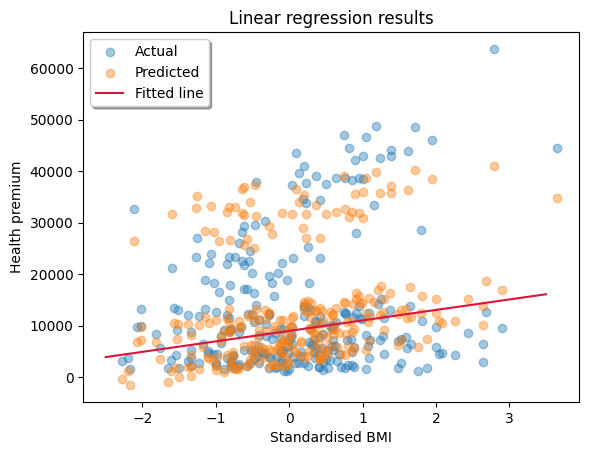

In [14]:
x=np.linspace(-2.5,3.5,20)
y=health_model.intercept_ + coef_matrix.loc[coef_matrix['var']=='bmi', 'coef'].item()*x

plt.scatter(X_test_n['bmi'], y_test, alpha=0.4, label='Actual')
plt.scatter(X_test_n['bmi'], y_pred_n, alpha=0.4, label='Predicted')
plt.plot(x,y, label='Fitted line', color='crimson')
plt.legend(shadow=True)
plt.title('Linear regression results')
plt.xlabel('Standardised BMI')
plt.ylabel('Health premium')
plt.show()